In [2]:
#nao foi desenvolvido por mim, apenas repliquei como forma de estudo
#fonte: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
traindata = pd.read_csv('./data/train.csv')
traindata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
traindata['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

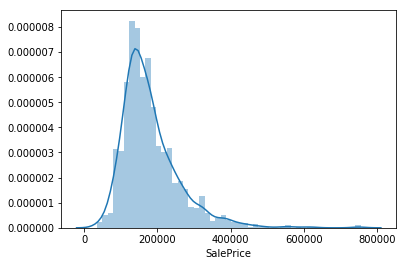

In [5]:
#histograma
sns.distplot(traindata['SalePrice'])

In [6]:
#calculando curtose e obliquidade
print("Skewness: %f" % traindata['SalePrice'].skew())
print("Kurtosis: %f" % traindata['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


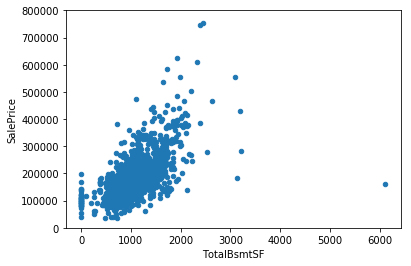

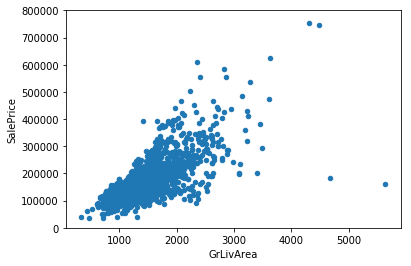

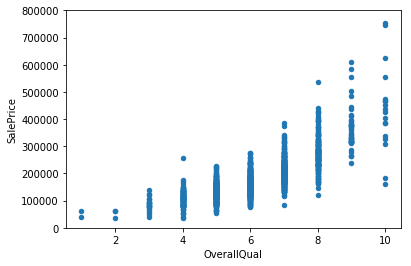

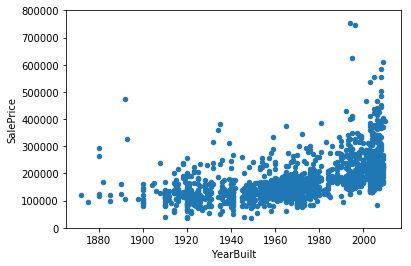

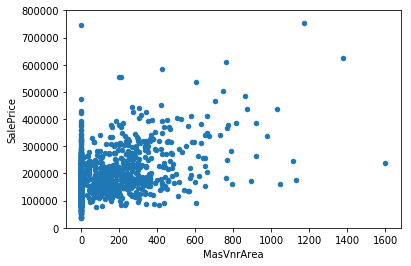

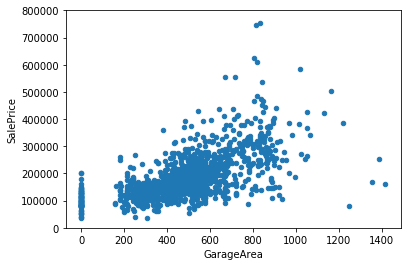

In [7]:
#analisar relaçao entre o preco e outros dados
dataToCompare = ['TotalBsmtSF', 'GrLivArea', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'GarageArea']
for var in dataToCompare:
    data = pd.concat([traindata['SalePrice'], traindata[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

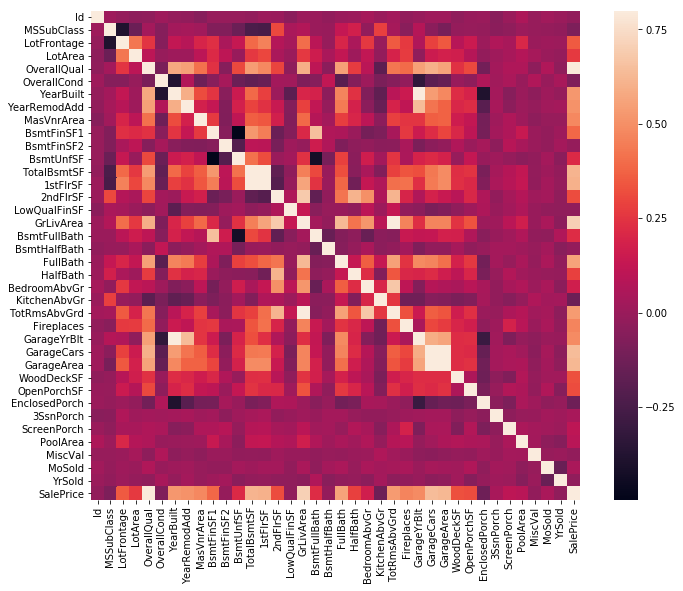

In [8]:
#Matriz de correlaçao entre os dados
corrmat = traindata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

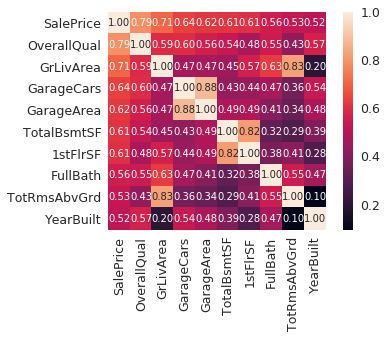

In [9]:
k=10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(traindata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
#informaçoes faltando
total = traindata.isnull().sum().sort_values(ascending=False)
percent = (traindata.isnull().sum()/traindata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
#removendo informaçoes faltando
traindata = traindata.drop((missing_data[missing_data['Total'] > 1]).index,1)
traindata = traindata.drop(traindata.loc[traindata['Electrical'].isnull()].index)
traindata.isnull().sum().max()

0

In [12]:
saleprice_scaled = StandardScaler().fit_transform(traindata['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


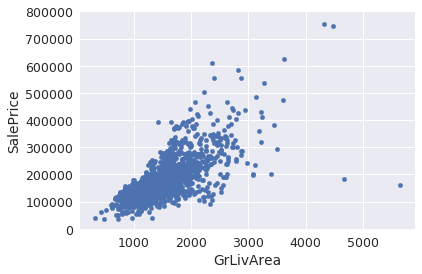

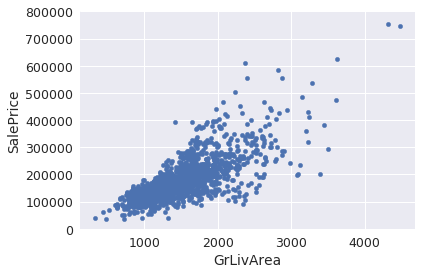

In [13]:
var = 'GrLivArea'
data = pd.concat([traindata['SalePrice'], traindata[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Excluindo pontos distantes da reta
traindata.sort_values(by = 'GrLivArea', ascending = False)[:2]
traindata = traindata.drop(traindata[traindata['Id'] == 1299].index)
traindata = traindata.drop(traindata[traindata['Id'] == 524].index)

data = pd.concat([traindata['SalePrice'], traindata[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL   